In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
# Add the project root directory to Python path
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))

In [2]:
from src.model import FraudModelTrainer

In [4]:
data_path= '../data/processed/fraud_features_engineered.csv'
output_path= '../models/best_model.joblib'

In [5]:
trainer = FraudModelTrainer(data_path=data_path)

Dropping columns that are all-NaN: ['time_since_previous_transaction', 'time_since_previous_transaction_seconds', 'time_since_previous_transaction_minutes', 'time_since_previous_transaction_hours', 'avg_time_between_transactions_min', 'std_time_between_transactions_min', 'min_time_between_transactions_min', 'max_time_between_transactions_min', 'transaction_velocity_category', 'std_purchase_value']
Number of NaNs after imputation: 0


In [6]:
trainer.train_models()
print("Training completed.")

Training completed.


In [7]:
trainer.evaluate_models()
print("Evaluation completed.")

Evaluation completed.


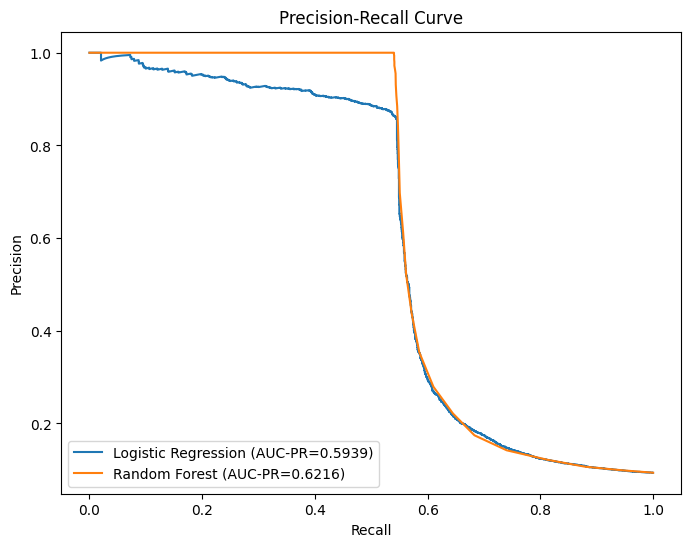

In [8]:
trainer.plot_precision_recall()

In [9]:
results = trainer.get_results()
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")


Model: Logistic Regression
F1-Score: 0.2740196415081382
AUC-PR: 0.593892529138372
Confusion Matrix: [[17657  9736]
 [  835  1995]]

Model: Random Forest
F1-Score: 0.7015370497820601
AUC-PR: 0.6216468095395883
Confusion Matrix: [[27393     0]
 [ 1301  1529]]


In [10]:
best_name, best_metrics = trainer.best_model()
print(f"\nBest Model: {best_name}")
print(f"F1-Score: {best_metrics['f1_score']}")
print(f"AUC-PR: {best_metrics['auc_pr']}")
print(f"Confusion Matrix:\n{best_metrics['confusion_matrix']}")


Best Model: Random Forest
F1-Score: 0.7015370497820601
AUC-PR: 0.6216468095395883
Confusion Matrix:
[[27393     0]
 [ 1301  1529]]


In [11]:
trainer.save_best_model(output_path='best_model.joblib')

Best model ('Random Forest') saved to best_model.joblib.
Feature names saved to models/model_features.joblib.
